In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.Open and display the image “dog.jpeg”. Convert the image in to numpy array, so that i can be used in further processing.
[Hint: Use PIL module from python]

In [117]:
from PIL import Image

In [118]:
img = Image.open("dogs.jpeg")

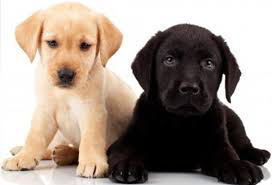

In [119]:
img

In [120]:
img_dat = np.array(img)

## 2. Find out the dimensions of the image and convert it in to a two-dimensional array.

In [121]:
img_dat.shape

(185, 272, 3)

In [122]:
img_dat.size

150960

In [123]:
temp = img_dat
for i in np.arange(15):
    print(temp[0][i])

[240 240 240]
[255 255 255]
[255 255 255]
[251 251 251]
[255 255 255]
[255 255 255]
[253 253 253]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]


In [129]:
img_dat_reshapped = np.reshape(img_dat, (185*272, 3))

In [130]:
img_dat_reshapped.shape

(50320, 3)

In [132]:
img_dat_reshapped[50]

array([248, 255, 255], dtype=uint8)

In [162]:
dat = pd.DataFrame(img_dat_reshapped, columns=['r', 'g', 'b'])

In [163]:
dat

,r,g,b
0,240,240,240
1,255,255,255
2,255,255,255
3,251,251,251
4,255,255,255
...,...,...,...
50315,254,254,254
50316,254,254,254
50317,254,254,254
50318,254,254,254


## 3.Use kmeans clustering with k set to 3 and cluster the image.
[Hint: Refer to k-means module of scikit learn]

In [127]:
from sklearn.cluster import KMeans

In [128]:
kmean_model = KMeans(n_clusters=3)

In [134]:
kmean_model.fit_predict(img_dat_reshapped)

array([2, 2, 2, ..., 2, 2, 2])

In [138]:
kmean_model.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [164]:
dat['clusters'] = pd.DataFrame(kmean_model.labels_)

In [165]:
dat

,r,g,b,clusters
0,240,240,240,2
1,255,255,255,2
2,255,255,255,2
3,251,251,251,2
4,255,255,255,2
...,...,...,...,...
50315,254,254,254,2
50316,254,254,254,2
50317,254,254,254,2
50318,254,254,254,2


In [147]:
clusters.value_counts()

2    19801
1    18293
0    12226
dtype: int64

In [150]:
clusters[0].unique()

array([2, 0, 1])

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='r'>

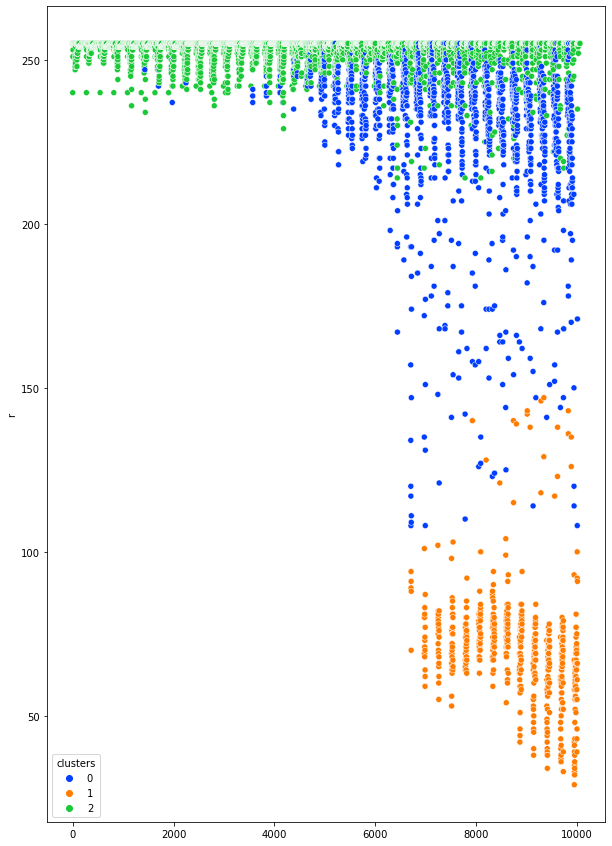

In [205]:
plt.figure(figsize=(10, 15))
siz = (int)(clusters.size/5)
sns.scatterplot(np.arange(siz),dat['r'][0:siz],  hue=dat['clusters'][0:(int)(siz)], palette='bright')

## 5. Find out the three dominant color in the image.
[Hint: The cluster centers should correspond to three dominant colors]

In [206]:
kmean_model.cluster_centers_

array([[210.67888107, 174.90716506, 143.81007689],
       [ 29.50970635,  21.57953738,  20.47312298],
       [251.5076993 , 247.72706619, 243.22416317]])

## 4. Predict the cluster label of every pixel in the image and plot it back as an image.

In [233]:
import plotly.express as px
df = dat
fig = px.scatter_3d(df, x='r', y='g', z='b',
              color='clusters')
fig.show()